## Assignment 3
### By Denis Khryashchev (dk2926)
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# reading Winter+Fall and Spring+Summer data into two dataframes.
# data can be accessed here http://www.citibikenyc.com/system-data
WinterFall = [pd.read_csv('201409-citibike-tripdata.csv'), pd.read_csv('201410-citibike-tripdata.csv'), 
              pd.read_csv('201411-citibike-tripdata.csv'), pd.read_csv('201412-citibike-tripdata.csv'),
              pd.read_csv('201501-citibike-tripdata.csv'), pd.read_csv('201502-citibike-tripdata.csv')]

WF = pd.concat(WinterFall, ignore_index=True)

SpringSummer = [pd.read_csv('201503-citibike-tripdata.csv'), pd.read_csv('201504-citibike-tripdata.csv'),
                pd.read_csv('201505-citibike-tripdata.csv'), pd.read_csv('201506-citibike-tripdata.csv'),
                pd.read_csv('201507-citibike-tripdata.csv'), pd.read_csv('201508-citibike-tripdata.csv'),]

SS = pd.concat(SpringSummer, ignore_index=True)

# print WF, SS

## 1) All the rides. Tests are performed wih the significance of 0.05. Tests: Anderson Darling, Shapiro-Wilk, and Kolmogorov-Smirnov. Null-hypothesis is distribution is normal

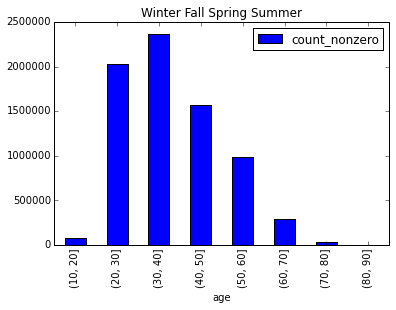

In [3]:
# Merging WinterFall + SpringSummer together to do Gaussian fit test
WFSS = pd.concat([WF, SS], ignore_index=True)
# calculating ages
WFSS['age'] = 2015-WFSS['birth year'][(WFSS['usertype'] == 'Subscriber')]
# cleaning data
WFSS['age'] = WFSS['age'][~np.isnan(WFSS['age'])]
# creating histogram bins
bins = np.arange(10, 99, 10)
WFSS.age.groupby(pd.cut(WFSS.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter Fall Spring Summer")
ages = WFSS.age.groupby(pd.cut(WFSS.age, bins)).agg([count_nonzero])

In [4]:
# Performing AD test against normal distribution
AD_norm = scipy.stats.anderson(ages['count_nonzero'],'norm')
print "Anderson Darling statistic: %s, critical values: %s, significance: %s" % AD_norm

Anderson Darling statistic: 0.490252353737, critical values: [ 0.519  0.591  0.709  0.827  0.984], significance: [ 15.   10.    5.    2.5   1. ]


In [5]:
# extracting statistics
print "AD-statistic = ", AD_norm[0], " is bigger than critical values ", AD_norm[1][2], " with significance of 0.05."
print "Therefore null-hypothesis cannot be rejected. The distribution is normal."

AD-statistic =  0.490252353737  is bigger than critical values  0.709  with significance of 0.05.
Therefore null-hypothesis cannot be rejected. The distribution is normal.


In [6]:
# Performing Shapiro-Wilk test against normal distribution
SHW_norm = scipy.stats.shapiro(ages['count_nonzero'], a=None, reta=False)
print "Shapiro-Wilk statistic: %s, p-value: %s " %SHW_norm

Shapiro-Wilk statistic: 0.860610246658, p-value: 0.121767483652 


In [7]:
#extracting statistics
print "Shapiro-Wilk statistic, W = ", SHW_norm[0], ", P-value is equal to %", SHW_norm[1], ", greater than 0.05"
print "Therefore the null-hypothesis cannot be rejected. The distribution is normal"

Shapiro-Wilk statistic, W =  0.860610246658 , P-value is equal to % 0.121767483652 , greater than 0.05
Therefore the null-hypothesis cannot be rejected. The distribution is normal


In [8]:
# Performing Kolmogorov-Smirnov test against normal distribution
ks=scipy.stats.kstest(ages, 'norm')
print "Kolmogorov-Smirnov statistic normal: %s, p-value: %s  "%ks

# Performing Kolmogorov-Smirnov test against cauchy distribution
ks=scipy.stats.kstest(ages, 'cauchy')
print "Kolmogorov-Smirnov statistic cauchy: %s, p-value: %s" %ks

Kolmogorov-Smirnov statistic normal: 1.0, p-value: 0.0  
Kolmogorov-Smirnov statistic cauchy: 0.999999865387, p-value: 0.0


In [9]:
# We reject the null hypothesis, that the distribution is either Normal, or Cauchu, because p-value is eqial to 0.0,
# and the K-S statistic is about 1.

## 2) Spring-Summer vs Fall-Winter. Tests are performed wih the significance of 0.05. Tests: Anderson Darling, Shapiro-Wilk, and Kolmogorov-Smirnov. Null-hypothesis is the distributions are the same

In [10]:
# calculating the ages
WF['age'] = 2015-WF['birth year'][(WF['usertype'] == 'Subscriber')]
SS['age'] = 2015-SS['birth year'][(SS['usertype'] == 'Subscriber')]
# cleaning the data
WF['age'] = WF['age'][~np.isnan(WF['age'])]
SS['age'] = SS['age'][~np.isnan(SS['age'])]

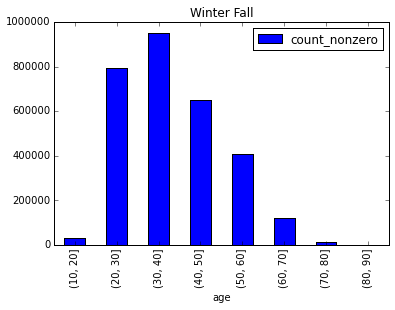

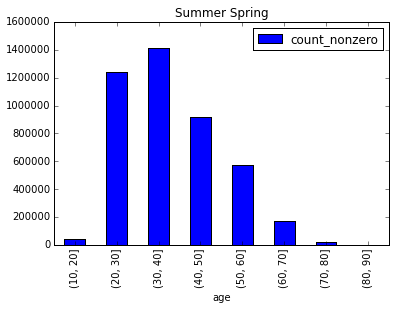

In [11]:
# Plotting the histograms of the distributions
bins = np.arange(10, 99, 10)
WF.age.groupby(pd.cut(WF.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter Fall")
ageWF = WF.age.groupby(pd.cut(WF.age, bins)).agg([count_nonzero])
SS.age.groupby(pd.cut(SS.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer Spring")
ageSS = SS.age.groupby(pd.cut(SS.age, bins)).agg([count_nonzero])

In [12]:
# Performing AD-test
ADWF_norm = scipy.stats.anderson(ageWF['count_nonzero'],'norm')
print "Anderson Darling statistic Winter Fall: %s, critical values: %s, significance: %s" %ADWF_norm
ADSS_norm = scipy.stats.anderson(ageSS['count_nonzero'], dist='norm')
print "Anderson Darling statistic Summer Spring: %s, critical values: %s, significance: %s" % ADSS_norm

Anderson Darling statistic Winter Fall: 0.482271648813, critical values: [ 0.519  0.591  0.709  0.827  0.984], significance: [ 15.   10.    5.    2.5   1. ]
Anderson Darling statistic Summer Spring: 0.499209084683, critical values: [ 0.519  0.591  0.709  0.827  0.984], significance: [ 15.   10.    5.    2.5   1. ]


In [13]:
# extracting statistics
print "AD-statistic Winter Fall = ", ADWF_norm[0], " is smaller than critical values ", ADWF_norm[1][2], " with significance of 0.05."
print "Therefore null-hypothesis cannot be rejected. The distribution is normal."

print "AD-statistic Winter Fall = ", ADSS_norm[0], " is smaller than critical values ", ADSS_norm[1][2], " with significance of 0.05."
print "Therefore null-hypothesis cannot be rejected. The distribution is normal."

AD-statistic Winter Fall =  0.482271648813  is smaller than critical values  0.709  with significance of 0.05.
Therefore null-hypothesis cannot be rejected. The distribution is normal.
AD-statistic Winter Fall =  0.499209084683  is smaller than critical values  0.709  with significance of 0.05.
Therefore null-hypothesis cannot be rejected. The distribution is normal.


In [15]:
# Performing Shapiro-Wilk tests
SHWF_norm = scipy.stats.shapiro(ageWF['count_nonzero'], a=None, reta=False)
SHSS_norm = scipy.stats.shapiro(ageSS['count_nonzero'], a=None, reta=False)

print "Shapiro-Wilk statistic Winter Fall: %s, p-value: %s " % SHWF_norm
print "Shapiro-Wilk statistic Spring Summer: %s, p-value: %s " % SHSS_norm

Shapiro-Wilk statistic Winter Fall: 0.864716053009, p-value: 0.133738219738 
Shapiro-Wilk statistic Spring Summer: 0.856833159924, p-value: 0.111635945737 


In [16]:
#extracting statistics
print "Shapiro-Wilk statistic, W = ", SHWF_norm[0], ", P-value is equal to %", SHWF_norm[1], ", greater than 0.05"
print "Therefore the null-hypothesis cannot be rejected. The distribution is normal"

#extracting statistics
print "Shapiro-Wilk statistic, W = ", SHSS_norm[0], ", P-value is equal to %", SHSS_norm[1], ", greater than 0.05"
print "Therefore the null-hypothesis cannot be rejected. The distribution is normal"

Shapiro-Wilk statistic, W =  0.864716053009 , P-value is equal to % 0.133738219738 , greater than 0.05
Therefore the null-hypothesis cannot be rejected. The distribution is normal
Shapiro-Wilk statistic, W =  0.856833159924 , P-value is equal to % 0.111635945737 , greater than 0.05
Therefore the null-hypothesis cannot be rejected. The distribution is normal


In [17]:
# Performing Kolmogorov-Smirnov test against normal distribution
ks_wf=scipy.stats.kstest(ageWF, 'norm')
print "Kolmogorov-Smirnov statistic Winter Fall normal: %s, p-value: %s  "%ks
ks_ss=scipy.stats.kstest(ageSS, 'norm')
print "Kolmogorov-Smirnov statistic Spring Summer normal: %s, p-value: %s  "%ks

# Performing Kolmogorov-Smirnov test against cauchy distribution
kswf_=scipy.stats.kstest(ageWF, 'cauchy')
print "Kolmogorov-Smirnov statistic Winter Fall cauchy: %s, p-value: %s" %ks
# Performing Kolmogorov-Smirnov test against cauchy distribution
kswf_=scipy.stats.kstest(ageSS, 'cauchy')
print "Kolmogorov-Smirnov statistic Spring Summer cauchy: %s, p-value: %s" %ks

Kolmogorov-Smirnov statistic Winter Fall normal: 0.999999865387, p-value: 0.0  
Kolmogorov-Smirnov statistic Spring Summer normal: 0.999999865387, p-value: 0.0  
Kolmogorov-Smirnov statistic Winter Fall cauchy: 0.999999865387, p-value: 0.0
Kolmogorov-Smirnov statistic Spring Summer cauchy: 0.999999865387, p-value: 0.0


In [18]:
# We reject the null hypothesis, that the distribution is either Normal, or Cauchu, because p-value is eqial to 0.0,
# and the K-S statistic is about 1.